In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고가 뜨지 않도록..
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 출력 창 청소
from IPython.display import clear_output

import time


# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 딥러닝
import tensorflow as tf

# 딥러닝 모델 구조를 정의하는 것
from tensorflow.keras.models import Sequential
# 층 모델(은닉층과 출력층)
from tensorflow.keras.layers import Dense
# 활성화 함수를 정의하는 것
from tensorflow.keras.layers import Activation

# 데이터 표준화
from sklearn.preprocessing import StandardScaler
# 문자열을 숫자로 변환
from sklearn.preprocessing import LabelEncoder
# 원핫인코딩
from tensorflow.keras.utils import to_categorical

# 학습데이터와 검증데이터로 나눈다
from sklearn.model_selection import train_test_split

# K폴드 교차검증
from sklearn.model_selection import KFold

# 저장된 모델을 복원
from tensorflow.keras.models import load_model

# epoch 마다 저장하기 위해 사용
from tensorflow.keras.callbacks import ModelCheckpoint
# 조기중단을 위해 사용
from tensorflow.keras.callbacks import EarlyStopping

# GPU 할당
gpus = tf.config.experimental.list_physical_devices('GPU')
# GPU가 있다면..
if len(gpus) > 0 :
    try :
        for gpu in gpus :
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e :
        print(e)


In [2]:
# MNIST 데이터
from tensorflow.keras.datasets import mnist


In [3]:
# 랜덤 시드 설정
np.random.seed(1)
tf.random.set_seed(1)

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [5]:
# 이미지 한장은 2차원 데이터로 구성되어 있기 때문에
# 행 하나 전체 데이터를 계산하는 딥러닝을 위해 1차원으로 변경한다.
# 3차원 행렬 -> 2차원
# 이미지의 개수
cnt = X_train.shape[0]
# 이미지의 세로길이
h1 = X_train.shape[1]
# 이미지의 가로길이
w1 = X_train.shape[2]

# 3차원 행렬 데이터를 2차원으로 변경한다.
X_train = X_train.reshape(cnt, w1 * h1)
# 0 ~ 1사의 숫자로 변경한다.(표준화)
X_train = X_train.astype('float64') # 255로 나눴을 때 실수값이 나와야 하기 때문에 실수로 변경
X_train = X_train / 255
X_train[0] # 행 하나

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [6]:
# 이미지 한장은 2차원 데이터로 구성되어 있기 때문에
# 행 하나 전체 데이터를 계산하는 딥러닝을 위해 1차원으로 변경한다.
# 3차원 행렬 -> 2차원
# 이미지의 개수
cnt = X_test.shape[0]
# 이미지의 세로길이
h1 = X_test.shape[1]
# 이미지의 가로길이
w1 = X_test.shape[2]

# 3차원 행렬 데이터를 2차원으로 변경한다.
X_test = X_test.reshape(cnt, w1 * h1)
# 0 ~ 1사의 숫자로 변경한다.(표준화)
X_test = X_test.astype('float64') # 255로 나눴을 때 실수값이 나와야 하기 때문에 실수로 변경
X_test = X_test / 255
X_test[0] # 행 하나

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [7]:
# 결과데이터 원핫 인코딩 
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0] # 10개

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [8]:
# 모델 설정
model = Sequential()

a1 = X_train.shape[1]

model.add(Dense(512, input_dim=a1))
model.add(Activation('relu'))

model.add(Dense(10)) # 결과데이터 10가지
model.add(Activation('softmax'))


In [9]:
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])


In [10]:
# 모델들이 저장될 파일명
# epoch : 학습 횟수
# val_loss : 검증 데이터 손실률
path1 = 'model/23/{epoch}-{val_loss}.h5'
path2 = 'model/23/최종.h5'

# 저장 콜백 설정
# save_best_only : True로 설정하면 개선이 되었을 때만 저장한다.
call1 = ModelCheckpoint(filepath=path1, monitor='val_loss', 
                        save_best_only=True)
call2 = ModelCheckpoint(filepath=path2, monitor='val_loss',
                        save_best_only=True)

# 조기 중단 콜백
# patience: 개선이 된 이후 몇 번을 더 볼 것인가를 설정.
# 이 횟수 동안 개선이 되지 않으면 중단.
call3 = EarlyStopping(monitor = 'val_loss', patience=50)

In [11]:
# 학습한다.
history = model.fit(X_train, y_train, epochs=2000, batch_size=500, 
          validation_data=[X_test, y_test],
          callbacks=[call1, call2, call3])

Epoch 1/2000
120/120 [==============================] - 1s 5ms/step - loss: 0.4008 - accuracy: 0.8910 - val_loss: 0.2058 - val_accuracy: 0.9412
Epoch 2/2000
120/120 [==============================] - 0s 4ms/step - loss: 0.1739 - accuracy: 0.9506 - val_loss: 0.1408 - val_accuracy: 0.9598
Epoch 3/2000
120/120 [==============================] - 1s 4ms/step - loss: 0.1223 - accuracy: 0.9658 - val_loss: 0.1120 - val_accuracy: 0.9668
Epoch 4/2000
120/120 [==============================] - 1s 4ms/step - loss: 0.0932 - accuracy: 0.9743 - val_loss: 0.0942 - val_accuracy: 0.9716
Epoch 5/2000
120/120 [==============================] - 1s 5ms/step - loss: 0.0740 - accuracy: 0.9796 - val_loss: 0.0843 - val_accuracy: 0.9745
Epoch 6/2000
120/120 [==============================] - 1s 5ms/step - loss: 0.0596 - accuracy: 0.9833 - val_loss: 0.0782 - val_accuracy: 0.9753
Epoch 7/2000
120/120 [==============================] - 1s 5ms/step - loss: 0.0495 - accuracy: 0.9865 - val_loss: 0.0678 - val_accuracy:

Epoch 57/2000
120/120 [==============================] - 1s 4ms/step - loss: 1.4439e-04 - accuracy: 1.0000 - val_loss: 0.0741 - val_accuracy: 0.9824
Epoch 58/2000
120/120 [==============================] - 0s 4ms/step - loss: 1.3213e-04 - accuracy: 1.0000 - val_loss: 0.0739 - val_accuracy: 0.9819
Epoch 59/2000
120/120 [==============================] - 0s 4ms/step - loss: 1.2468e-04 - accuracy: 1.0000 - val_loss: 0.0750 - val_accuracy: 0.9827
Epoch 60/2000
120/120 [==============================] - 0s 4ms/step - loss: 1.1324e-04 - accuracy: 1.0000 - val_loss: 0.0752 - val_accuracy: 0.9824
Epoch 61/2000
120/120 [==============================] - 1s 4ms/step - loss: 1.0581e-04 - accuracy: 1.0000 - val_loss: 0.0757 - val_accuracy: 0.9826
Epoch 62/2000
120/120 [==============================] - 1s 4ms/step - loss: 9.8553e-05 - accuracy: 1.0000 - val_loss: 0.0764 - val_accuracy: 0.9826
Epoch 63/2000
120/120 [==============================] - 0s 4ms/step - loss: 9.1988e-05 - accuracy: 1.0000

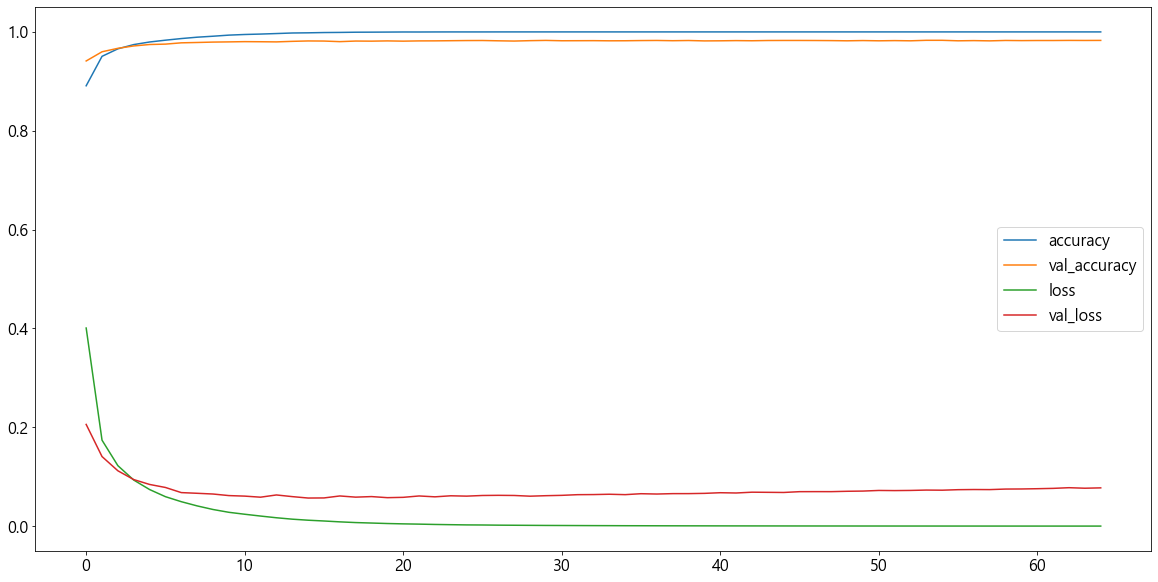

In [12]:
# 오차 정도를 그래프로 그린다.
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()


In [13]:
# 모델을 복원한다.
model2 = load_model(path2)
model2

In [14]:
a1 = model2.evaluate(X_test, y_test)
print(f'손실률 : {a1[0]}')
print(f'정확도 : {a1[1]}')

313/313 [==============================] - 1s 3ms/step - loss: 0.0568 - accuracy: 0.9817
손실률 : 0.056838978081941605
정확도 : 0.9817000031471252


In [15]:
pred = model2.predict(X_test)
pred

array([[4.39576162e-08, 5.21416244e-09, 4.09321547e-06, ...,
        9.99872804e-01, 6.43539636e-07, 1.15116745e-05],
       [5.92800864e-10, 1.76713309e-06, 9.99997973e-01, ...,
        2.30540650e-14, 1.23069583e-07, 7.00446602e-12],
       [8.88504360e-07, 9.99276459e-01, 1.57571776e-04, ...,
        2.69445882e-04, 1.79034934e-04, 1.39980136e-06],
       ...,
       [6.68188031e-12, 1.71069322e-11, 2.66463457e-12, ...,
        9.18803892e-07, 5.06972469e-07, 5.17909439e-06],
       [4.00509376e-10, 1.07977282e-11, 8.52923548e-12, ...,
        7.99328048e-10, 2.78759453e-05, 1.33486572e-11],
       [9.25315435e-10, 1.12801051e-13, 2.36994402e-09, ...,
        3.62799898e-14, 1.42872008e-11, 1.03394576e-11]], dtype=float32)

In [16]:
pred2 = np.argmax(pred,axis=-1)
pred2

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [18]:
# 얼마나 일치하는가
y_test2 = np.argmax(y_test,axis=-1)

r1 = accuracy_score(y_test2, pred2)
r1

0.9817